# Download Data

In [ ]:
# For Google Colab. If not on Colab, make sure kaggle.json is it the right location
from google.colab import files

# upload kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# move kaggle.json to the right location
!pip install -q kaggle
!ls
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

kaggle.json  sample_data


In [ ]:
# upgrade lightgbm
!pip install --upgrade lightgbm
!pip install --upgrade xgboost

     |████████████████████████████████| 2.0 MB 4.2 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3
     |████████████████████████████████| 173.5 MB 9.6 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# download our dataset using the Kaggle api
!kaggle competitions download home-credit-default-risk -p "home-credit-default-risk"

 94% 256M/271M [00:03<00:00, 111MB/s] 
100% 271M/271M [00:03<00:00, 74.1MB/s]
 85% 92.0M/109M [00:00<00:00, 95.1MB/s]
100% 109M/109M [00:00<00:00, 122MB/s]  
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 167MB/s]
  0% 0.00/5.81M [00:00<?, ?B/s]
100% 5.81M/5.81M [00:00<00:00, 53.7MB/s]
 81% 62.0M/76.3M [00:00<00:00, 98.8MB/s]
100% 76.3M/76.3M [00:00<00:00, 123MB/s] 
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 69.0MB/s]
 82% 79.0M/96.7M [00:00<00:00, 144MB/s]
100% 96.7M/96.7M [00:00<00:00, 152MB/s]
 84% 31.0M/36.8M [00:00<00:00, 85.9MB/s]
100% 36.8M/36.8M [00:00<00:00, 103MB/s] 
 91% 33.0M/36.1M [00:00<00:00, 57.0MB/s]
100% 36.1M/36.1M [00:00<00:00, 73.5MB/s]
 90% 51.0M/56.8M [00:00<00:00, 95.6MB/s]
100% 56.8M/56.8M [00:00<00:00, 105MB/s] 


In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd

zip_ref = zipfile.ZipFile('home-credit-default-risk/application_train.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/application_test.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/bureau_balance.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/bureau.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/credit_card_balance.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/installments_payments.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/POS_CASH_balance.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/previous_application.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()

# Load datasets from files

In [ ]:
import numpy as np
import pandas as pd 
import os
import zipfile
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(3))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
DATA_DIR = "datasets" # folder where unzipped files are

ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


In [ ]:
# datasets that we have
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

# New Application Features

We use a brute-force approach to consider all ways of combining our application data to create new data. This uses a lot of RAM and can't be run twice without clearing all RAM. For that reason the code is commented out and only specific examples are picked out.

In [ ]:
all_num_features = [
  "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "REGION_POPULATION_RELATIVE",
  "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "CNT_FAM_MEMBERS",
  "EXT_SOURCE_2", "EXT_SOURCE_3","AMT_GOODS_PRICE", "OBS_30_CNT_SOCIAL_CIRCLE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",
  "DAYS_LAST_PHONE_CHANGE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY",
  "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT",
  "AMT_REQ_CREDIT_BUREAU_YEAR", "DAYS_ID_PUBLISH",
]

## Creating new features

In [ ]:
# test_df = pd.DataFrame()
# corrs = {}

# # this is an example for addition. Due to memory constraints, we can only run
# # one operation (+,-,/,*) per run
# for key1 in all_num_features:
#   for key2 in all_num_features:
#     if key1 != key2:
#       test_df[key1+"+"+key2] = datasets["application_train"][key1] + datasets["application_train"][key2]
#       corrs[key1+"+"+key2] = test_df[key1+"+"+key2].corr(datasets["application_train"]['TARGET'])

# test_df

,CNT_CHILDREN+AMT_INCOME_TOTAL,CNT_CHILDREN+AMT_CREDIT,CNT_CHILDREN+AMT_ANNUITY,CNT_CHILDREN+REGION_POPULATION_RELATIVE,CNT_CHILDREN+DAYS_BIRTH,CNT_CHILDREN+DAYS_EMPLOYED,CNT_CHILDREN+DAYS_REGISTRATION,CNT_CHILDREN+CNT_FAM_MEMBERS,CNT_CHILDREN+EXT_SOURCE_2,CNT_CHILDREN+EXT_SOURCE_3,CNT_CHILDREN+AMT_GOODS_PRICE,CNT_CHILDREN+OBS_30_CNT_SOCIAL_CIRCLE,CNT_CHILDREN+DEF_30_CNT_SOCIAL_CIRCLE,CNT_CHILDREN+OBS_60_CNT_SOCIAL_CIRCLE,CNT_CHILDREN+DEF_60_CNT_SOCIAL_CIRCLE,CNT_CHILDREN+DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN+AMT_REQ_CREDIT_BUREAU_HOUR,CNT_CHILDREN+AMT_REQ_CREDIT_BUREAU_DAY,CNT_CHILDREN+AMT_REQ_CREDIT_BUREAU_WEEK,CNT_CHILDREN+AMT_REQ_CREDIT_BUREAU_MON,CNT_CHILDREN+AMT_REQ_CREDIT_BUREAU_QRT,CNT_CHILDREN+AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN+DAYS_ID_PUBLISH,AMT_INCOME_TOTAL+CNT_CHILDREN,AMT_INCOME_TOTAL+AMT_CREDIT,AMT_INCOME_TOTAL+AMT_ANNUITY,AMT_INCOME_TOTAL+REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL+DAYS_BIRTH,AMT_INCOME_TOTAL+DAYS_EMPLOYED,AMT_INCOME_TOTAL+DAYS_REGISTRATION,AMT_INCOME_TOTAL+CNT_FAM_MEMBERS,AMT_INCOME_TOTAL+EXT_SOURCE_2,AMT_INCOME_TOTAL+EXT_SOURCE_3,AMT_INCOME_TOTAL+AMT_GOODS_PRICE,AMT_INCOME_TOTAL+OBS_30_CNT_SOCIAL_CIRCLE,AMT_INCOME_TOTAL+DEF_30_CNT_SOCIAL_CIRCLE,AMT_INCOME_TOTAL+OBS_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_TOTAL+DEF_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_TOTAL+DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL+AMT_REQ_CREDIT_BUREAU_HOUR,...,AMT_REQ_CREDIT_BUREAU_YEAR+DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_YEAR+DAYS_REGISTRATION,AMT_REQ_CREDIT_BUREAU_YEAR+CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_YEAR+EXT_SOURCE_2,AMT_REQ_CREDIT_BUREAU_YEAR+EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR+AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_YEAR+OBS_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR+DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR+OBS_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR+DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR+DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR+AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR+AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_YEAR+AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR+AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR+AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR+DAYS_ID_PUBLISH,DAYS_ID_PUBLISH+CNT_CHILDREN,DAYS_ID_PUBLISH+AMT_INCOME_TOTAL,DAYS_ID_PUBLISH+AMT_CREDIT,DAYS_ID_PUBLISH+AMT_ANNUITY,DAYS_ID_PUBLISH+REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH+DAYS_BIRTH,DAYS_ID_PUBLISH+DAYS_EMPLOYED,DAYS_ID_PUBLISH+DAYS_REGISTRATION,DAYS_ID_PUBLISH+CNT_FAM_MEMBERS,DAYS_ID_PUBLISH+EXT_SOURCE_2,DAYS_ID_PUBLISH+EXT_SOURCE_3,DAYS_ID_PUBLISH+AMT_GOODS_PRICE,DAYS_ID_PUBLISH+OBS_30_CNT_SOCIAL_CIRCLE,DAYS_ID_PUBLISH+DEF_30_CNT_SOCIAL_CIRCLE,DAYS_ID_PUBLISH+OBS_60_CNT_SOCIAL_CIRCLE,DAYS_ID_PUBLISH+DEF_60_CNT_SOCIAL_CIRCLE,DAYS_ID_PUBLISH+DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH+AMT_REQ_CREDIT_BUREAU_HOUR,DAYS_ID_PUBLISH+AMT_REQ_CREDIT_BUREAU_DAY,DAYS_ID_PUBLISH+AMT_REQ_CREDIT_BUREAU_WEEK,DAYS_ID_PUBLISH+AMT_REQ_CREDIT_BUREAU_MON,DAYS_ID_PUBLISH+AMT_REQ_CREDIT_BUREAU_QRT,DAYS_ID_PUBLISH+AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,1.0,0.262949,0.139376,351000.0,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,-2120,202500.0,609097.5,227200.5,202500.018801,193039.0,201863.0,198852.0,202501.0,202500.262949,202500.139376,553500.0,202502.0,202502.0,202502.0,202502.0,201366.0,202500.0,...,-636.0,-3647.0,2.0,1.262949,1.139376,351001.0,3.0,3.0,3.0,3.0,-1133.0,1.0,1.0,1.0,1.0,1.0,-2119.0,-2120,200380.0,404477.5,22580.5,-2119.981199,-11581,-2757,-5768.0,-2119.0,-2119.737051,-2119.860624,348880.0,-2118.0,-2118.0,-2118.0,-2118.0,-3254.0,-2120.0,-2120.0,-2120.0,-2120.0,-2120.0,-2119.0
1,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,2.0,0.622246,NaN,1129500.0,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,-291,270000.0,1563502.5,305698.5,270000.003541,253235.0,268812.0,268814.0,270002.0,270000.622246,NaN,1399500.0,270001.0,270000.0,270001.0,270000.0,269172.0,270000.0,...,-1188.0,-1186.0,2.0,0.622246,NaN,1129500.0,1.0,0.0,1.0,0.0,-828.0,

In [ ]:
# corrs

{'AMT_ANNUITY+AMT_CREDIT': -0.029992788388881832,
 'AMT_ANNUITY+AMT_GOODS_PRICE': -0.03895368748304597,
 'AMT_ANNUITY+AMT_INCOME_TOTAL': -0.004700974848291929,
 'AMT_ANNUITY+AMT_REQ_CREDIT_BUREAU_DAY': -0.012692007797941576,
 'AMT_ANNUITY+AMT_REQ_CREDIT_BUREAU_HOUR': -0.012692023119781126,
 'AMT_ANNUITY+AMT_REQ_CREDIT_BUREAU_MON': -0.012692790257676228,
 'AMT_ANNUITY+AMT_REQ_CREDIT_BUREAU_QRT': -0.012692133281444523,
 'AMT_ANNUITY+AMT_REQ_CREDIT_BUREAU_WEEK': -0.012692014912021786,
 'AMT_ANNUITY+AMT_REQ_CREDIT_BUREAU_YEAR': -0.012689457376392555,
 'AMT_ANNUITY+CNT_CHILDREN': -0.012815592203985579,
 'AMT_ANNUITY+CNT_FAM_MEMBERS': -0.012815340626177356,
 'AMT_ANNUITY+DAYS_BIRTH': 0.010259714626087352,
 'AMT_ANNUITY+DAYS_EMPLOYED': -0.04650592688659311,
 'AMT_ANNUITY+DAYS_ID_PUBLISH': -0.007408521914076275,
 'AMT_ANNUITY+DAYS_LAST_PHONE_CHANGE': -0.009686006998367894,
 'AMT_ANNUITY+DAYS_REGISTRATION': -0.0025179304005540164,
 'AMT_ANNUITY+DEF_30_CNT_SOCIAL_CIRCLE': -0.012743848657843827,


## Analysis of new features

Of all the features we created, there were some interesting results just looking at the correlation values. But now we should visually inspect our new data for anomilies or red flags.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# some generalized functions to make the analysis easy on us
def cat_bar(df, x, ax):
  df2 = df.groupby(x)['TARGET'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
  sns.barplot(x=x,y='percent',hue='TARGET',data=df2,ax=ax)

def num_hist(df, y, ax, log=False):
  if log: ax.set_yscale('log')

  ax.hist(df[df["TARGET"]==1][y], bins=15, alpha=0.5, color="red", label="Problems")
  ax.hist(df[df["TARGET"]==0][y], bins=15, alpha=0.5, color="blue", label="No Problems")

  ax.set_xlabel(y)
  ax.set_ylabel("# of Loans")
  ax.legend()

def missing_vals(df):
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
  sum_missing = df.isna().sum().sort_values(ascending = False)
  missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
  return missing_data.head(10)

In [ ]:
temp_app = pd.DataFrame()
app_df = datasets['application_train']
temp_app["TARGET"] = app_df['TARGET']

temp_app["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = app_df['REGION_POPULATION_RELATIVE'] * app_df['DAYS_ID_PUBLISH']
temp_app["AMT_CREDIT/AMT_GOODS_PRICE"] = app_df['AMT_CREDIT'] / app_df['AMT_GOODS_PRICE']
temp_app["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = app_df['DEF_30_CNT_SOCIAL_CIRCLE'] / app_df['OBS_30_CNT_SOCIAL_CIRCLE']
temp_app["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = app_df['DAYS_BIRTH'] + app_df['DAYS_LAST_PHONE_CHANGE']

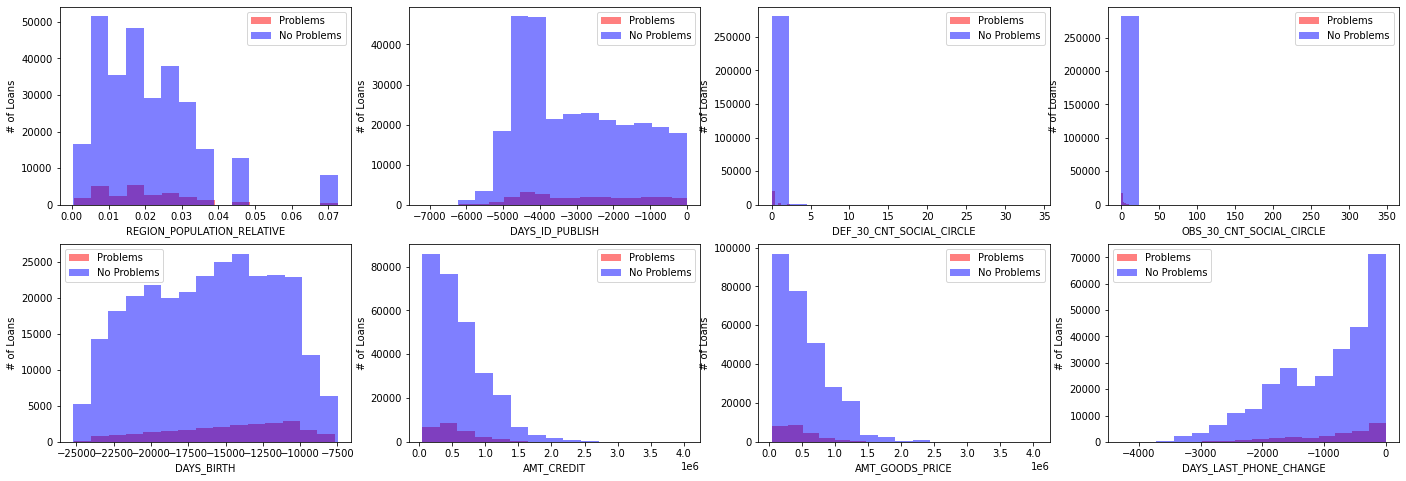

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(24, 8))
num_hist(app_df, "REGION_POPULATION_RELATIVE", axs[0,0])
num_hist(app_df, "DAYS_ID_PUBLISH", axs[0,1])
num_hist(app_df, "DEF_30_CNT_SOCIAL_CIRCLE", axs[0,2])
num_hist(app_df, "OBS_30_CNT_SOCIAL_CIRCLE", axs[0,3])

num_hist(app_df, "DAYS_BIRTH", axs[1,0])
num_hist(app_df, "AMT_CREDIT", axs[1,1])
num_hist(app_df, "AMT_GOODS_PRICE", axs[1,2])
num_hist(app_df, "DAYS_LAST_PHONE_CHANGE", axs[1,3])

Above are the original features used to create the new features, which are graphed below. It might be useful to come back and reference these graphs

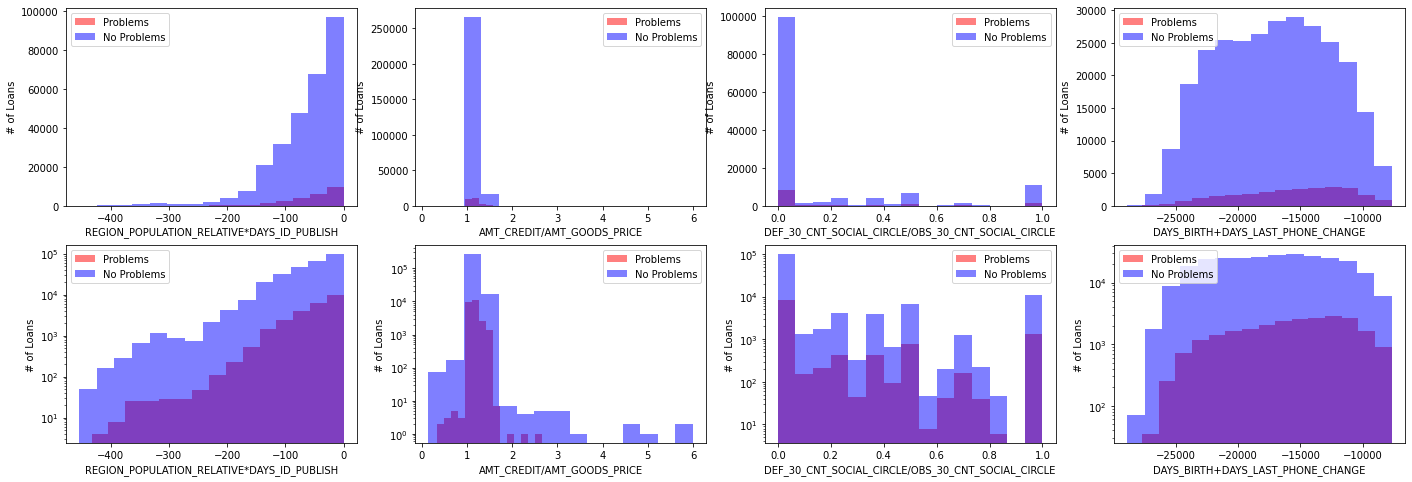

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(24, 8))
num_hist(temp_app, "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", axs[0,0])
num_hist(temp_app, "AMT_CREDIT/AMT_GOODS_PRICE", axs[0,1])
num_hist(temp_app, "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE", axs[0,2])
num_hist(temp_app, "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE", axs[0,3])
# log graphs
num_hist(temp_app, "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", axs[1,0], True)
num_hist(temp_app, "AMT_CREDIT/AMT_GOODS_PRICE", axs[1,1], True)
num_hist(temp_app, "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE", axs[1,2], True)
num_hist(temp_app, "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE", axs[1,3], True)

These relationships are quite interesting.

By referencing the graphs above this set, `REGION_POPULATION_RELATIVE` and `DAYS_ID_PUBLISH` have graphs with one high point around the middle. However, `REGION_POPULATION_RELATION*DAYS_ID_PUBLISH` has a clear trend that, the further to the right, the more problems the client has with repayment.

`DEF_30_CNT_SOCIAL_CIRCLE` and `OBS_30_CNT_SOCIAL_CIRCLE` both had an extremely large portion of the samples in one region and it was really hard to even pick points apart, but `DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE` does a much better job of spreading those points apart.

# Baseline Model for just Application Data

Let's create a basic model with just applicaiton data

In [ ]:
results = pd.DataFrame(columns=["ExpID", "ROC AUC Score", "Cross fold train accuracy", "Test Accuracy", "Train Time(s)", "Test Time(s)", "Experiment description"])


In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH"
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = datasets["application_train"].loc[:, datasets['application_train'].columns != "TARGET"]
y_train = datasets["application_train"]['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)


In [ ]:
results.loc[0] = ["Baseline", roc,pct(logit_score_train), np.round(pct(logit_score_test),3), 
                   train_time, test_time, "LogisticRegression"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,92.0,91.7,8.8396,0.398,LogisticRegression


Of course, this score isn't very good. In the Kaggle competition, it would place us 5773 out of 7176 entries. However, it's a good baseline to evaluate our future models on

# Baseline Model with our new features

In [ ]:
# create new features
app_df = datasets['application_train']

app_df["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = app_df['REGION_POPULATION_RELATIVE'] * app_df['DAYS_ID_PUBLISH']
app_df["AMT_CREDIT/AMT_GOODS_PRICE"] = app_df['AMT_CREDIT'] / app_df['AMT_GOODS_PRICE']
app_df["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = app_df['DEF_30_CNT_SOCIAL_CIRCLE'] / app_df['OBS_30_CNT_SOCIAL_CIRCLE']
app_df["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = app_df['DAYS_BIRTH'] + app_df['DAYS_LAST_PHONE_CHANGE']
app_df["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = app_df['DEF_30_CNT_SOCIAL_CIRCLE'] + app_df['DEF_60_CNT_SOCIAL_CIRCLE']
app_df["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = app_df['AMT_GOODS_PRICE'] + app_df['DAYS_EMPLOYED']
app_df["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = app_df['REGION_POPULATION_RELATIVE'] * app_df['AMT_GOODS_PRICE']

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = datasets["application_train"].loc[:, datasets['application_train'].columns != "TARGET"]
y_train = datasets["application_train"]['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)


In [ ]:
results.loc[1] = ["Baseline", roc,pct(logit_score_train), np.round(pct(logit_score_test),3), 
                   train_time, test_time, "LogisticRegression + new Application features"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,92.0,91.7,8.8396,0.3980,LogisticRegression
1,Baseline,0.739299,92.0,91.7,8.7200,0.4097,LogisticRegression + new Application features


We can see that our new features didn't improve our accuracy, but the ROC AUC score was improved. Since the AUC score is the most important metric to us, this is a success

# New Features for Other Datasets

In [ ]:
def missing_vals(df):
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
  sum_missing = df.isna().sum().sort_values(ascending = False)
  missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
  return missing_data.head(10)

## Previous Applications

In [ ]:
PA_df = datasets['previous_application'].groupby('SK_ID_CURR').agg({
    "AMT_APPLICATION": "mean",
    "CNT_PAYMENT": "max",
    "DAYS_TERMINATION":"mean",

    "NAME_PORTFOLIO": "max",
    "NAME_GOODS_CATEGORY": "max",
    "NAME_SELLER_INDUSTRY": "max",
})

###Previous PCB

In [ ]:
PCB_df_copy = datasets['POS_CASH_balance'].groupby('SK_ID_PREV').agg({
    "CNT_INSTALMENT": "count",
    "CNT_INSTALMENT_FUTURE": "mean",
    "MONTHS_BALANCE": "min",
})

In [ ]:
POS_to_PA_df =  datasets['previous_application'].merge(PCB_df_copy, how='left', on='SK_ID_PREV')

In [ ]:
PCB_df_temp = POS_to_PA_df.groupby('SK_ID_CURR').agg({
    "CNT_INSTALMENT": "count",
    "CNT_INSTALMENT_FUTURE": "mean",
    "MONTHS_BALANCE": "min",
})
PCB_df_temp=PCB_df_temp.rename({"CNT_INSTALMENT":"PREV_CNT_INSTALMENT","CNT_INSTALMENT_FUTURE":"PREV_CNT_INSTALMENT_FUTURE","MONTHS_BALANCE":"PREV_PCB_MONTHS_BALANCE" }, axis='columns')

In [ ]:
PA_df = pd.concat([PA_df, PCB_df_temp], axis=1)

EDA:

In [ ]:
temp_app = datasets['application_train'].merge(PCB_df_temp, how='left', on='SK_ID_CURR')

In [ ]:
print(temp_app[["PREV_CNT_INSTALMENT", "PREV_CNT_INSTALMENT_FUTURE","PREV_PCB_MONTHS_BALANCE", "TARGET"]].corr()["TARGET"])

missing_vals(temp_app[["PREV_CNT_INSTALMENT", "PREV_CNT_INSTALMENT_FUTURE","PREV_PCB_MONTHS_BALANCE" ]])

PREV_CNT_INSTALMENT          -0.038646
PREV_CNT_INSTALMENT_FUTURE    0.032835
PREV_PCB_MONTHS_BALANCE       0.050945
TARGET                        1.000000
Name: TARGET, dtype: float64


NameError: ignored

###Previous IP

In [ ]:
IP_df_copy = datasets['installments_payments'].groupby('SK_ID_PREV').agg({
    "AMT_INSTALMENT": "sum",
    "AMT_PAYMENT": "sum",
    "DAYS_INSTALMENT": "min",
    "DAYS_ENTRY_PAYMENT": "min",
})
IP_df_copy["SUM_MISSED"] = IP_df_copy["AMT_INSTALMENT"] - IP_df_copy["AMT_PAYMENT"]

In [ ]:
IP_to_PA_df =  datasets['previous_application'].merge(IP_df_copy, how='left', on='SK_ID_PREV')

In [ ]:
IP_df_temp = IP_to_PA_df.groupby('SK_ID_CURR').agg({
    "AMT_INSTALMENT": "sum",
    "AMT_PAYMENT": "sum",
    "DAYS_INSTALMENT": "min",
    "DAYS_ENTRY_PAYMENT": "min"
})
IP_df_temp = IP_df_temp.rename({"AMT_INSTALMENT":"PREV_AMT_INSTALMENT", "AMT_PAYMENT":"PREV_AMT_PAYMENT", "DAYS_INSTALMENT":"PREV_DAYS_INSTALMENT",  "DAYS_ENTRY_PAYMENT": "PREV_DAYS_ENTRY_PAYMENT"}, axis = 'columns')

In [ ]:
PA_df = pd.concat([PA_df, IP_df_temp], axis=1)

EDA:

In [ ]:
temp_app = datasets['application_train'].merge(IP_df_temp, how='left', on='SK_ID_CURR')

In [ ]:
print(temp_app[["PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT", "PREV_DAYS_INSTALMENT", "PREV_DAYS_ENTRY_PAYMENT", "TARGET"]].corr()["TARGET"])

missing_vals(temp_app[["PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT", "PREV_DAYS_INSTALMENT", "PREV_DAYS_ENTRY_PAYMENT" ]])

PREV_AMT_INSTALMENT       -0.018711
PREV_AMT_PAYMENT          -0.023428
PREV_DAYS_INSTALMENT       0.053545
PREV_DAYS_ENTRY_PAYMENT    0.053701
TARGET                     1.000000
Name: TARGET, dtype: float64


,Percent,Missing Count
PREV_DAYS_ENTRY_PAYMENT,5.89,18113
PREV_DAYS_INSTALMENT,5.89,18105
PREV_AMT_PAYMENT,5.35,16454
PREV_AMT_INSTALMENT,5.35,16454


###Previous CCB

In [ ]:
CCB_df_copy = datasets['credit_card_balance'].groupby('SK_ID_PREV').agg({
    "AMT_BALANCE": "mean",
    "MONTHS_BALANCE": "min",
    "AMT_CREDIT_LIMIT_ACTUAL": "count",
})


In [ ]:
CCB_to_PA_df =  datasets['previous_application'].merge(CCB_df_copy, how='left', on='SK_ID_PREV')

In [ ]:
CCB_df_temp = CCB_to_PA_df.groupby('SK_ID_CURR').agg({
    "AMT_BALANCE": "mean",
    "MONTHS_BALANCE": "min",
    "AMT_CREDIT_LIMIT_ACTUAL": "count"
})
CCB_df_temp = CCB_df_temp.rename({"AMT_BALANCE":"PREV_AMT_BALANCE", "MONTHS_BALANCE": "PREV_CCB_MONTHS_BALANCE","AMT_CREDIT_LIMIT_ACTUAL":"PREV_AMT_CREDIT_LIMIT_ACTUAL"}, axis ='columns')

In [ ]:
PA_df = pd.concat([PA_df, CCB_df_temp], axis=1)

EDA:

In [ ]:
temp_app = datasets['application_train'].merge(CCB_df_temp, how='left', on='SK_ID_CURR')

In [ ]:
print(temp_app[["PREV_AMT_BALANCE", "PREV_CCB_MONTHS_BALANCE", "PREV_AMT_CREDIT_LIMIT_ACTUAL", "TARGET"]].corr()["TARGET"])

missing_vals(temp_app[["PREV_AMT_BALANCE", "PREV_CCB_MONTHS_BALANCE", "PREV_AMT_CREDIT_LIMIT_ACTUAL"]])

PREV_AMT_BALANCE                0.086693
PREV_CCB_MONTHS_BALANCE         0.049798
PREV_AMT_CREDIT_LIMIT_ACTUAL    0.018769
TARGET                          1.000000
Name: TARGET, dtype: float64


,Percent,Missing Count
PREV_CCB_MONTHS_BALANCE,74.66,229577
PREV_AMT_BALANCE,74.66,229577
PREV_AMT_CREDIT_LIMIT_ACTUAL,5.35,16454


## POS Cash Balances

In [ ]:
PCB_df = datasets['POS_CASH_balance'].groupby('SK_ID_CURR').agg({
    "CNT_INSTALMENT": "count",
    "CNT_INSTALMENT_FUTURE": "mean",
    "MONTHS_BALANCE": "min",
})

In [ ]:
comb_app = datasets['application_train'].merge(PCB_df, how='left', on='SK_ID_CURR')

In [ ]:
new_features = ["CNT_INSTALMENT", "CNT_INSTALMENT_FUTURE", "MONTHS_BALANCE"]

In [ ]:
test_df = pd.DataFrame()
corrs = {}

# this is an example for addition. Due to memory constraints, we can only run
# one operation (+,-,/,*) per run
for key1 in all_num_features:
  for key2 in new_features:
    if key1 != key2:
      test_df[key1+"+"+key2] = comb_app[key1] + comb_app[key2]
      corrs[key1+"+"+key2] = test_df[key1+"+"+key2].corr(comb_app['TARGET'])

test_df

NameError: ignored

In [ ]:
corrs

{'AMT_ANNUITY+CNT_INSTALMENT': -0.008515917780832676,
 'AMT_ANNUITY+CNT_INSTALMENT_FUTURE': -0.008440793501912184,
 'AMT_ANNUITY+MONTHS_BALANCE': -0.008338714976260993,
 'AMT_CREDIT+CNT_INSTALMENT': -0.02730806085465315,
 'AMT_CREDIT+CNT_INSTALMENT_FUTURE': -0.027297097637611626,
 'AMT_CREDIT+MONTHS_BALANCE': -0.02730186511138258,
 'AMT_GOODS_PRICE+CNT_INSTALMENT': -0.03656542567387583,
 'AMT_GOODS_PRICE+CNT_INSTALMENT_FUTURE': -0.03655459975717435,
 'AMT_GOODS_PRICE+MONTHS_BALANCE': -0.03655872795487446,
 'AMT_INCOME_TOTAL+CNT_INSTALMENT': -0.0017020454766113427,
 'AMT_INCOME_TOTAL+CNT_INSTALMENT_FUTURE': -0.0016998058664761252,
 'AMT_INCOME_TOTAL+MONTHS_BALANCE': -0.0016916258330551884,
 'AMT_REQ_CREDIT_BUREAU_DAY+CNT_INSTALMENT': -0.033312974162881134,
 'AMT_REQ_CREDIT_BUREAU_DAY+CNT_INSTALMENT_FUTURE': 0.030706893892791954,
 'AMT_REQ_CREDIT_BUREAU_DAY+MONTHS_BALANCE': 0.05194559120209246,
 'AMT_REQ_CREDIT_BUREAU_HOUR+CNT_INSTALMENT': -0.03332075980975123,
 'AMT_REQ_CREDIT_BUREAU_HO

## Instalment Payments

In [ ]:
IP_df = datasets['installments_payments'].groupby('SK_ID_CURR').agg({
    "AMT_INSTALMENT": "sum",
    "AMT_PAYMENT": "sum",
    "DAYS_INSTALMENT": "min",
    "DAYS_ENTRY_PAYMENT": "min",
})
IP_df["SUM_MISSED"] = IP_df["AMT_INSTALMENT"] - IP_df["AMT_PAYMENT"]

In [ ]:
comb_app = datasets['application_train'].merge(IP_df, how='left', on='SK_ID_CURR')

In [ ]:
new_features = ["AMT_INSTALMENT", "AMT_PAYMENT", "DAYS_INSTALMENT", "DAYS_ENTRY_PAYMENT", "SUM_MISSED"]

In [ ]:
test_df = pd.DataFrame()
corrs = {}

# this is an example for addition. Due to memory constraints, we can only run
# one operation (+,-,/,*) per run
for key1 in all_num_features:
  for key2 in new_features:
    if key1 != key2:
      test_df[key1+"-"+key2] = comb_app[key1] - comb_app[key2]
      corrs[key1+"-"+key2] = test_df[key1+"-"+key2].corr(comb_app['TARGET'])

test_df

NameError: ignored

In [ ]:
corrs

{'AMT_ANNUITY-AMT_INSTALMENT': 0.019716211234084097,
 'AMT_ANNUITY-AMT_PAYMENT': 0.02429603376430387,
 'AMT_ANNUITY-DAYS_ENTRY_PAYMENT': -0.012659572423444008,
 'AMT_ANNUITY-DAYS_INSTALMENT': -0.012655013549201491,
 'AMT_ANNUITY-SUM_MISSED': -0.028478592241464488,
 'AMT_CREDIT-AMT_INSTALMENT': 0.007315135880388606,
 'AMT_CREDIT-AMT_PAYMENT': 0.012321352050999787,
 'AMT_CREDIT-DAYS_ENTRY_PAYMENT': -0.027842341138886666,
 'AMT_CREDIT-DAYS_INSTALMENT': -0.027835645523273583,
 'AMT_CREDIT-SUM_MISSED': -0.03587613896728746,
 'AMT_GOODS_PRICE-AMT_INSTALMENT': 0.00478790296137049,
 'AMT_GOODS_PRICE-AMT_PAYMENT': 0.009923263711473665,
 'AMT_GOODS_PRICE-DAYS_ENTRY_PAYMENT': -0.03711095933545598,
 'AMT_GOODS_PRICE-DAYS_INSTALMENT': -0.03710582679088353,
 'AMT_GOODS_PRICE-SUM_MISSED': -0.04435465676736081,
 'AMT_INCOME_TOTAL-AMT_INSTALMENT': 0.019063287531481916,
 'AMT_INCOME_TOTAL-AMT_PAYMENT': 0.02363384844208317,
 'AMT_INCOME_TOTAL-DAYS_ENTRY_PAYMENT': -0.0020267002947920083,
 'AMT_INCOME_TOTA

## Bureau

In [ ]:
B_df = datasets['bureau'].groupby('SK_ID_CURR').agg({
    "CREDIT_TYPE": "min",
    "CREDIT_ACTIVE": "max",
    "DAYS_CREDIT": "mean",
    "AMT_CREDIT_SUM": "max",
})

In [ ]:
comb_app = datasets['application_train'].merge(B_df, how='left', on='SK_ID_CURR')

In [ ]:
new_features = ["DAYS_CREDIT", "AMT_CREDIT_SUM"]

In [ ]:
test_df = pd.DataFrame()
corrs = {}

# this is an example for addition. Due to memory constraints, we can only run
# one operation (+,-,/,*) per run
for key1 in all_num_features:
  for key2 in new_features:
    if key1 != key2:
      test_df[key1+"*"+key2] = comb_app[key1] * comb_app[key2]
      corrs[key1+"*"+key2] = test_df[key1+"*"+key2].corr(comb_app['TARGET'])

test_df

NameError: ignored

In [ ]:
corrs

### Bureau Balance dataset



In [ ]:
BB_df = datasets['bureau_balance'].groupby('SK_ID_BUREAU').agg({
    "MONTHS_BALANCE": "min",
    "STATUS": ["max", "min", "count"] 
})


In [ ]:
temp = pd.DataFrame({"MONTHS_BALANCE_MIN": BB_df["MONTHS_BALANCE"]["min"],  "STATUS_MAX": BB_df["STATUS"]["max"], "STATUS_MIN":BB_df["STATUS"]["min"], "STATUS_COUNT": BB_df["STATUS"]["count"]})
BB_df = temp

In [ ]:
BB_to_B_df =  datasets['bureau'].merge(BB_df, how='left', on='SK_ID_BUREAU')
BB_to_B_df = BB_to_B_df.dropna(subset = ["STATUS_MAX","STATUS_MIN"])
B_df_temp = BB_to_B_df.groupby('SK_ID_CURR').agg({
    "MONTHS_BALANCE_MIN": "min",
    "STATUS_MIN": "min",
    "STATUS_MAX" : 'max',
    "STATUS_COUNT": "count"
})

In [ ]:
B_df = pd.concat([B_df, B_df_temp], axis=1)

### EDA for Bureau Balance

In [ ]:
temp_app = datasets['application_train'].merge(B_df_temp, how='left', on='SK_ID_CURR')

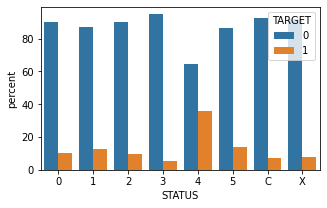

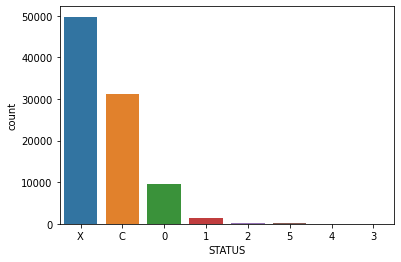

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def cat_bar(df, x, ax):
  df2 = df.groupby(x)['TARGET'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
  sns.barplot(x=x,y='percent',hue='TARGET',data=df2,ax=ax)

fig, axs = plt.subplots(1, 1, figsize=(5, 3))
cat_bar(temp_app, 'STATUS', axs)
plt.show()
sns.countplot(temp_app["STATUS"])

It looks like `STATUS` is pretty interesting, especially for values like 4 and 3. Unfortunately, there's not a lot of data for it

Now, let's take a look at our new feature, `BUREAU_MONTHS_BALANCE`

In [ ]:
def missing_vals(df):
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
  sum_missing = df.isna().sum().sort_values(ascending = False)
  missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
  return missing_data.head(10)

print(temp_app[["BUREAU_MONTHS_BALANCE", "TARGET"]].corr()["TARGET"])

missing_vals(temp_app[["BUREAU_MONTHS_BALANCE", "TARGET"]])

BUREAU_MONTHS_BALANCE    0.076424
TARGET                   1.000000
Name: TARGET, dtype: float64


,Percent,Missing Count
BUREAU_MONTHS_BALANCE,70.01,215280
TARGET,0.00,0


`BUREAU_MONTHS_BALANCE` seems to be relatively strongly correlated with our target, but 70% of the data is missing.

## Credit Card Balances

In [ ]:
CCB_df = datasets['credit_card_balance'].groupby('SK_ID_CURR').agg({
    "AMT_BALANCE": "mean",
    "MONTHS_BALANCE": "min",
    "AMT_CREDIT_LIMIT_ACTUAL": "count",
})

In [ ]:
comb_app = datasets['application_train'].merge(CCB_df, how='left', on='SK_ID_CURR')

In [ ]:
new_features = ["AMT_BALANCE", "MONTHS_BALANCE", "AMT_CREDIT_LIMIT_ACTUAL"]

In [ ]:
test_df = pd.DataFrame()
corrs = {}

# this is an example for addition. Due to memory constraints, we can only run
# one operation (+,-,/,*) per run
for key1 in all_num_features:
  for key2 in new_features:
    if key1 != key2:
      test_df[key1+"+"+key2] = comb_app[key1] + comb_app[key2]
      corrs[key1+"+"+key2] = test_df[key1+"+"+key2].corr(comb_app['TARGET'])

test_df

NameError: ignored

In [ ]:
corrs

{'AMT_ANNUITY+AMT_BALANCE': 0.08371049424218176,
 'AMT_ANNUITY+AMT_CREDIT_LIMIT_ACTUAL': -0.025063558915545698,
 'AMT_ANNUITY+MONTHS_BALANCE': -0.024771390825012576,
 'AMT_CREDIT+AMT_BALANCE': -0.009802925077219879,
 'AMT_CREDIT+AMT_CREDIT_LIMIT_ACTUAL': -0.03503374158665453,
 'AMT_CREDIT+MONTHS_BALANCE': -0.03502380865670211,
 'AMT_GOODS_PRICE+AMT_BALANCE': -0.015940860495845664,
 'AMT_GOODS_PRICE+AMT_CREDIT_LIMIT_ACTUAL': -0.04367573383904863,
 'AMT_GOODS_PRICE+MONTHS_BALANCE': -0.04366514956971031,
 'AMT_INCOME_TOTAL+AMT_BALANCE': 0.04845092882920461,
 'AMT_INCOME_TOTAL+AMT_CREDIT_LIMIT_ACTUAL': -0.017685313734971734,
 'AMT_INCOME_TOTAL+MONTHS_BALANCE': -0.0176466574023929,
 'AMT_REQ_CREDIT_BUREAU_DAY+AMT_BALANCE': 0.08599405922754703,
 'AMT_REQ_CREDIT_BUREAU_DAY+AMT_CREDIT_LIMIT_ACTUAL': -0.058841283458255025,
 'AMT_REQ_CREDIT_BUREAU_DAY+MONTHS_BALANCE': 0.05975592643099151,
 'AMT_REQ_CREDIT_BUREAU_HOUR+AMT_BALANCE': 0.08599405852655541,
 'AMT_REQ_CREDIT_BUREAU_HOUR+AMT_CREDIT_LIMI

# Baseline for all data

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE",
  
  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL"
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)


In [ ]:
results.loc[2] = ["Baseline", roc,pct(logit_score_train), np.round(pct(logit_score_test),3), 
                   train_time, test_time, "LogisticRegression + other datasets"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,92.0,91.7,8.8396,0.3980,LogisticRegression
1,Baseline,0.739299,92.0,91.7,8.7200,0.4097,LogisticRegression + new Application features
2,Baseline,0.740311,92.0,91.7,10.4090,0.5733,LogisticRegression + other datasets


This doesn't really improve our ROC_AUC score very much

# Baseline with new feature for all data

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)


In [ ]:
results.loc[3] = ["Baseline", roc,pct(logit_score_train), np.round(pct(logit_score_test),3), 
                   train_time, test_time, "LogisticRegression + other datasets + new features"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,92.0,91.7,8.8396,0.3980,LogisticRegression
1,Baseline,0.739299,92.0,91.7,8.7200,0.4097,LogisticRegression + new Application features
2,Baseline,0.740311,92.0,91.7,10.4090,0.5733,LogisticRegression + other datasets
3,Baseline,0.745049,92.0,91.7,13.2626,0.5951,LogisticRegression + other datasets + new feat...


The new features that we created really seem to help our AUC score

# More Data

Let's look at how adding even more data affects our model

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)


In [ ]:
results.loc[4] = ["Baseline", roc,pct(logit_score_train), np.round(pct(logit_score_test),3),
                   train_time, test_time, "LogisticRegression + even more data"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,92.0,91.7,8.8396,0.3980,LogisticRegression
1,Baseline,0.739299,92.0,91.7,8.7200,0.4097,LogisticRegression + new Application features
2,Baseline,0.740311,92.0,91.7,10.4090,0.5733,LogisticRegression + other datasets
3,Baseline,0.745049,92.0,91.7,13.2626,0.5951,LogisticRegression + other datasets + new feat...
4,Baseline,0.745513,92.0,91.7,15.3700,0.6871,LogisticRegression + even more data


# Tweaking Imputers

Perhaps we should be using the categorical imputer with a constant strategy. Instead of assigning NaN data with the most frequent category, maybe we should instead create a new category for all of this data. This would deal with certain categories, like employment data types, where it seemed that unemployed clients were labeled as NaN and shouldn't be grouped in with other categories.

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)


In [ ]:
results.loc[5] = ["Baseline", roc,pct(logit_score_train), np.round(pct(logit_score_test),3), 
                   train_time, test_time, "LogisticRegression w/ Constant Imputer"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,92.0,91.7,8.8396,0.3980,LogisticRegression
1,Baseline,0.739299,92.0,91.7,8.7200,0.4097,LogisticRegression + new Application features
2,Baseline,0.740311,92.0,91.7,10.4090,0.5733,LogisticRegression + other datasets
3,Baseline,0.745049,92.0,91.7,13.2626,0.5951,LogisticRegression + other datasets + new feat...
4,Baseline,0.745513,92.0,91.7,15.3700,0.6871,LogisticRegression + even more data
5,Baseline,0.747196,92.0,91.7,12.2126,0.5966,LogisticRegression w/ Constant Imputer


Since this test doesn't include the "even more data" from the previous test, we are comparing it with experiment 3, and it performs better. We should continue using this change to the imputer in the future

# Untuned LGBM

Let's train an LGBM Classifier on the data from application plus the data from our datasets and new engineered features

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('predictor', LGBMClassifier())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)


In [ ]:
results.loc[6] = ["LGBM", roc,pct(logit_score_train), np.round(pct(logit_score_test),3), 
                   train_time, test_time, "Untuned LGBM"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,92.0,91.7,8.8396,0.3980,LogisticRegression
1,Baseline,0.739299,92.0,91.7,8.7200,0.4097,LogisticRegression + new Application features
2,Baseline,0.740311,92.0,91.7,10.4090,0.5733,LogisticRegression + other datasets
3,Baseline,0.745049,92.0,91.7,13.2626,0.5951,LogisticRegression + other datasets + new feat...
4,Baseline,0.745513,92.0,91.7,15.3700,0.6871,LogisticRegression + even more data
5,Baseline,0.747196,92.0,91.7,12.2126,0.5966,LogisticRegression w/ Constant Imputer
6,LGBM,0.755799,92.0,91.8,10.2569,0.9940,Untuned LGBM


As you can see, it performs the best of any models we have yet. We still need to tune it, and can add more data

# Adding New Dataset Features

These features are from aggregating the Bureau dataset by the `bureau_balance` dataset and from using SK_ID_PREV to collect more data for the previous application dataset.

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('predictor', LGBMClassifier())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)


In [ ]:
results.loc[7] = ["LGBM", roc,pct(logit_score_train), np.round(pct(logit_score_test),3), 
                   train_time, test_time, "Untuned LGBM + aggregated datasets"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,92.0,91.7,8.8396,0.3980,LogisticRegression
1,Baseline,0.739299,92.0,91.7,8.7200,0.4097,LogisticRegression + new Application features
2,Baseline,0.740311,92.0,91.7,10.4090,0.5733,LogisticRegression + other datasets
3,Baseline,0.745049,92.0,91.7,13.2626,0.5951,LogisticRegression + other datasets + new feat...
4,Baseline,0.745513,92.0,91.7,15.3700,0.6871,LogisticRegression + even more data
5,Baseline,0.747196,92.0,91.7,12.2126,0.5966,LogisticRegression w/ Constant Imputer
6,LGBM,0.755799,92.0,91.8,10.2569,0.9940,Untuned LGBM
7,LGBM,0.763666,92.0,91.8,15.1481,1.2404,Untuned LGBM + aggregated datasets


These new features clearly make our model better. Now, we need to do optimize it using Grid Search

# Grid Search for LGBM

Since Grid Search takes a while when testing for larger values of n_estimators, we tested all other hyperparameters before testing n_estimators

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline_with_predictor = Pipeline([
  ("preprocessing", preprocess_pipeline),
  ("predictor", LGBMClassifier(colsample_bytree=0.1, max_depth=5, n_estimators=100, num_leaves=20, min_split_gain=1))
])

# Execute the grid search
params = {
    'predictor__colsample_bytree': [0.0, 0.1, 0.2, 0.5],
    'predictor__max_depth': [-1, 3, 5, 10],
    'predictor__min_split_gain': [0.0, 0.5, 1],
    'predictor__num_leaves': [10, 20, 31, 42],
}

grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='roc_auc', cv=3,
                            n_jobs=-1, verbose=True)

In [ ]:
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)
grid_search.fit(X_train, y_train)

best_train = pct(grid_search.best_score_)
print("best train score: {}".format(best_train))

print("Best Parameters:")
best_parameters = grid_search.best_estimator_.get_params()
param_dump = []
for param_name in sorted(params.keys()):
  param_dump.append((param_name, best_parameters[param_name]))
  print("\t"+str(param_name)+": " + str(best_parameters[param_name]))

Fitting 3 folds for each of 192 candidates, totalling 576 fits
best train score: 76.3
Best Parameters:
	predictor__colsample_bytree: 0.5
	predictor__max_depth: 10
	predictor__min_split_gain: 1
	predictor__num_leaves: 31


# Tuned LGBM

Let's add the extra data that we got from the "More Data" experiment to an LGBM model with tuned hyperparameters



In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('predictor', LGBMClassifier(colsample_bytree=0.5, max_depth=10, n_estimators=500, num_leaves=31, min_split_gain=1))
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)


In [ ]:
results.loc[8] = ["LGBM", roc,pct(logit_score_train), np.round(pct(logit_score_test),3), 
                   train_time, test_time, "LGBM tuned"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,92,91.7,8.83960,0.398000,LogisticRegression
1,Baseline,0.739299,92,91.7,8.72000,0.409700,LogisticRegression + new Application features
2,Baseline,0.740311,92,91.7,10.40900,0.573300,LogisticRegression + other datasets
3,Baseline,0.745049,92,91.7,13.26260,0.595100,LogisticRegression + other datasets + new feat...
4,Baseline,0.745513,92,91.7,15.37000,0.687100,LogisticRegression + even more data
5,Baseline,0.747196,92,91.7,12.21260,0.596600,LogisticRegression w/ Constant Imputer
6,LGBM,0.755799,92,91.8,10.25690,0.994000,Untuned LGBM
7,LGBM,0.763666,92,91.8,15.14810,1.240400,Untuned LGBM + aggregated datasets
8,LGBM,0.763879,92,91.7,42.14050,2.552300,LGBM tuned
9,XGBoost,0.756850,91.9,91.7,230.20260,1.238900,Untuned XGBoost


## Feature Importances and Analysis

Let's take a close look at our feature importances

In [ ]:
# from matplotlib import pyplot as plt
model = full_pipeline.steps[1][1]
features = list(full_pipeline.steps[0][1].transformer_list[1][1].steps[2][1].get_feature_names(cat_features)) + num_features

pd.DataFrame({'Value':model.feature_importances_,'Feature':features}).sort_values(by="Value",ascending=False).tail(25)

,Value,Feature
61,0,OCCUPATION_TYPE_Security staff
60,0,OCCUPATION_TYPE_Secretaries
59,0,OCCUPATION_TYPE_Sales staff
58,0,OCCUPATION_TYPE_Realty agents
89,0,CREDIT_TYPE_Car loan
91,0,CREDIT_TYPE_Consumer credit
132,0,DAYS_ID_PUBLISH
114,0,STATUS_MAX_0
131,0,DAYS_BIRTH
129,0,ELEVATORS_AVG


Interestingly, some of our best correlation data is left as totally unused by our model, such as `FLOORSMIN_AVG` and `ELEVATORS_AVG`. This may be because they weren't useful since this data was missing for a large amount of samples. This also might be because it's highly correlated with other similar features, like `TOTALAREA_MODE`.

Unfortunately, it looks like `CREDIT_ACTIVE` was almost a completely useless feature.

In [ ]:
pd.DataFrame({'Value':model.feature_importances_,'Feature':features}).sort_values(by="Value",ascending=False).head(50)

,Value,Feature
1,614,FLAG_DOCUMENT_3_1
39,596,HOUR_APPR_PROCESS_START_18
0,545,FLAG_DOCUMENT_3_0
15,521,NAME_INCOME_TYPE_Working
42,514,HOUR_APPR_PROCESS_START_21
2,513,REGION_RATING_CLIENT_1
30,499,HOUR_APPR_PROCESS_START_9
9,495,NAME_INCOME_TYPE_Commercial associate
19,445,NAME_EDUCATION_TYPE_Lower secondary
25,442,HOUR_APPR_PROCESS_START_4


The best pieces of data are all categorical. Specifically, it looks like `HOUR_APPR_PROCESS_START` and `FLAG_DOCUMENT_3` were very informative. It's interesting that the flags for the other documents were far less informative, since `FLAG_DOCUMENT_4` is in the data set.

There aren't any important numerical features, at least as far as we can see.

In [ ]:
imp_df = pd.DataFrame({'Value':model.feature_importances_,'Feature':features})
print("Unimportant data points: {}%".format(round(sum(imp_df["Value"] == 0) / len(imp_df)*100, 2)))

Unimportant data points: 34.68%


Overall, it looks like around 34% of our features weren't used by our model. While a few of them mentioned above were numerical features, some categorical features, like `OCCUPATION_TYPE`, had data points in both the most useful and least useful features, since there were a lot of possible values.

## Test Data and Kaggle Submission

In [ ]:
test = datasets['application_test']
test = test.merge(PA_df, how='left', on='SK_ID_CURR')
test = test.merge(PCB_df, how='left', on='SK_ID_CURR')
test = test.merge(IP_df, how='left', on='SK_ID_CURR')
test = test.merge(B_df, how='left', on='SK_ID_CURR')
test = test.merge(CCB_df, how='left', on='SK_ID_CURR')

test["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = test['REGION_POPULATION_RELATIVE'] * test['DAYS_ID_PUBLISH']
test["AMT_CREDIT/AMT_GOODS_PRICE"] = test['AMT_CREDIT'] / test['AMT_GOODS_PRICE']
test["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = test['DEF_30_CNT_SOCIAL_CIRCLE'] / test['OBS_30_CNT_SOCIAL_CIRCLE']
test["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = test['DAYS_BIRTH'] + test['DAYS_LAST_PHONE_CHANGE']
test["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = test['DEF_30_CNT_SOCIAL_CIRCLE'] + test['DEF_60_CNT_SOCIAL_CIRCLE']
test["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = test['AMT_GOODS_PRICE'] + test['DAYS_EMPLOYED']
test["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = test['REGION_POPULATION_RELATIVE'] * test['AMT_GOODS_PRICE']

test["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = test["DAYS_LAST_PHONE_CHANGE"] + test["CNT_PAYMENT"]
test["DAYS_BIRTH+MONTHS_BALANCE"] = test["DAYS_BIRTH"] + test["MONTHS_BALANCE_x"]
test["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = test["DAYS_LAST_PHONE_CHANGE"] + test["DAYS_ENTRY_PAYMENT"]
test["DAYS_BIRTH*DAYS_CREDIT"] = test["DAYS_BIRTH"] * test["DAYS_CREDIT"]

In [ ]:
preds = full_pipeline.predict_proba(test)[:, 1]
submit_df = test[['SK_ID_CURR']]
submit_df['TARGET'] = preds

submit_df.to_csv("submission.csv",index=False)

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.019393
1,100005,0.088354
2,100013,0.020129
3,100028,0.022614
4,100038,0.121096


In [ ]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "lgbm submission"

100% 1.26M/1.26M [00:00<00:00, 5.00MB/s]
Successfully submitted to Home Credit Default Risk

# Untuned XGBoost

Now that we've taken a deep dive into our LGBM model, let's explore what XGBoost has to offer

In [ ]:
from xgboost import XGBClassifier

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('predictor', XGBClassifier())
])

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

cv10Splits = ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv10Splits.split(X_train))
logit_score_train = logit_scores.mean()

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)


[22:38:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [ ]:
results.loc[9] = ["XGBoost", roc,pct(logit_score_train), np.round(pct(logit_score_test),3), 
                   train_time, test_time, "Untuned XGBoost"]
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,92.0,91.7,8.8396,0.3980,LogisticRegression
1,Baseline,0.739299,92.0,91.7,8.7200,0.4097,LogisticRegression + new Application features
2,Baseline,0.740311,92.0,91.7,10.4090,0.5733,LogisticRegression + other datasets
3,Baseline,0.745049,92.0,91.7,13.2626,0.5951,LogisticRegression + other datasets + new feat...
4,Baseline,0.745513,92.0,91.7,15.3700,0.6871,LogisticRegression + even more data
5,Baseline,0.747196,92.0,91.7,12.2126,0.5966,LogisticRegression w/ Constant Imputer
6,LGBM,0.755799,92.0,91.8,10.2569,0.9940,Untuned LGBM
7,LGBM,0.763666,92.0,91.8,15.1481,1.2404,Untuned LGBM + aggregated datasets
8,LGBM,0.763879,92.0,91.7,46.4837,2.4076,LGBM tuned
9,XGBoost,0.756850,91.9,91.7,230.2026,1.2389,Untuned XGBoost


#Deep Learning Model

For simplicity, we will train this model on application data for 100 epochs

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
app = datasets["application_train"]
train_x = app.loc[:, app.columns != "TARGET"]
train_y = app["TARGET"]
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, random_state=30)


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# preprocess data
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH"
]

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
# to tensors
train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()

In [ ]:
# globals
batch_size = 64
num_epochs = 100
num_in = train_x.shape[1]
num_layer_1 = 20
num_output = 2

In [ ]:
# create data loaders
train_set = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [ ]:
class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(num_in, num_layer_1),
        nn.ReLU(),
        nn.Linear(num_layer_1, num_output)
    )

  def forward(self, x):
    out = self.linear(x)
    return nn.functional.softmax(out)

model = CustomModel()
opt = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

In [ ]:
losses = []
epochs = num_epochs
start = time()
for epoch in range(epochs):
  running_loss = 0.0
  for batch, data in enumerate(data_loader):
    input, labels = data[0], data[1]

    opt.zero_grad()
    pred = model(input)[:, 0]
    loss = loss_fn(pred, labels)
    loss.backward()
    opt.step()

    running_loss += loss

  losses.append(running_loss/batch_size)
train_time = time() - start

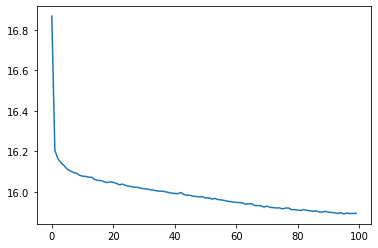

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)

In [ ]:
from sklearn.metrics import roc_auc_score

start = time()
preds = model(test_x_tensor)[:,0].detach().numpy()
roc = roc_auc_score(test_y, preds)
test_time = time() - start

In [ ]:
results.loc[10] = ["Deep Learning", roc, "--", "--", 
                   train_time, test_time, "Deep Learning w/ Application Data"]

results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,92,91.7,8.83960,0.398000,LogisticRegression
1,Baseline,0.739299,92,91.7,8.72000,0.409700,LogisticRegression + new Application features
2,Baseline,0.740311,92,91.7,10.40900,0.573300,LogisticRegression + other datasets
3,Baseline,0.745049,92,91.7,13.26260,0.595100,LogisticRegression + other datasets + new feat...
4,Baseline,0.745513,92,91.7,15.37000,0.687100,LogisticRegression + even more data
5,Baseline,0.747196,92,91.7,12.21260,0.596600,LogisticRegression w/ Constant Imputer
6,LGBM,0.755799,92,91.8,10.25690,0.994000,Untuned LGBM
7,LGBM,0.763666,92,91.8,15.14810,1.240400,Untuned LGBM + aggregated datasets
8,LGBM,0.765221,80.7,79.9,42.38470,2.595000,LGBM tuned
9,XGBoost,0.756850,91.9,91.7,230.20260,1.238900,Untuned XGBoost
